## Manifold Learning PCA LLE on Wine Dataset
    
Data Set Information: Kaggle Red Wine Dataset. 1599 examples with 12 features on wine quality. Predict wine quality (0-10).

https://www.kaggle.com/piyushgoyal443/red-wine-dataset#wineQualityInfo.txt

1) Load the wine quality data set.

2) Fit PCA and plot the cumulative sum of the `pca.explained_variance_ratio_`.

3) Identify the number of principal components to explain 90% of the variance.

4) Build a logistic regression model and record the accuracy.

5) Repeat step 4 using LLE with the same number of components and 30 neighbors.

6) Record your observations and identify your top performing model. Does manifold learning improve predictive performance over PCA in this case?

### Red Wine Dataset

Citation Request: This dataset is publicly available for research. The details are described in [Cortez et al., 2009]. Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016 

#### Description of attributes:

1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of wine is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

#### Output variable (based on sensory data): 

12 - quality (score between 0 and 10)

### Load the wine quality dataset and important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import manifold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding

df = pd.read_csv(
    "https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/wineQualityReds.csv"
)
# df.info()
# df.head()

In [2]:
# Check the shape of the DataFrame
df.shape

(1599, 13)

In [3]:
# Check for missing values and handle them appropriately if there are any
df.isnull().sum()[lambda x:x>0]

Series([], dtype: int64)

In [4]:
df = df.drop('Unnamed: 0', 1)

We're interested in predicting the `quality` based on the other features.
* Investigate the `quality` column.
    * What are the most common values?
    * Show this with a plot.

In [5]:
# Check the unique values from "quality" column
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [6]:
# Count the unique values in "quality" column
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

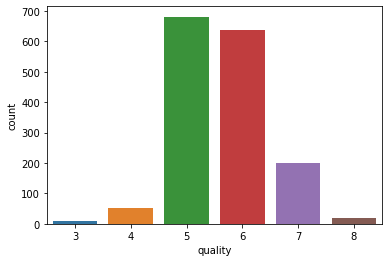

In [7]:
# Plot for quality
sns.countplot(x=df['quality'])
plt.show()

Separate the `X` and the `y` in preparation to create a supervised learning model.

In [8]:
# Separate dependent and independent variables
X = df.drop('quality', 1)
y = df['quality']

In [9]:
# Check and print X
X.shape

(1599, 11)

In [10]:
# Check and print y
y.shape

(1599,)

Perform a train test split.

In [11]:
# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In our modeling process we'd like to use `PCA`.  `PCA` is sensitive to data being on different scales.  Scale the data using `StandardScaler`.

In [12]:
# Feature Scaling
scaler = StandardScaler()
X_train_sca = scaler.fit_transform(X_train)
X_test_sca = scaler.transform(X_test)

Fit an instance of `PCA` to `X_train` and explore the `explained_variance_ratio_` attribute.  Create a plot showing the cumulative sum of `.explained_variance_ratio_`.

In [13]:
pca = PCA(n_components=X.shape[1])
X_train_pca = pca.fit_transform(X_train_sca)

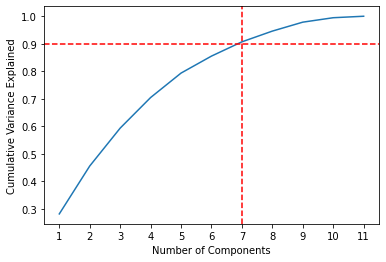

In [14]:
sns.lineplot(x=range(1, X.shape[1]+1), 
             y=np.cumsum(pca.explained_variance_ratio_))

plt.axhline(y=0.9, c='r', ls='--')
plt.axvline(x=7, c='r', ls='--')
plt.ylabel('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.xticks(ticks=range(1, X.shape[1]+1))
plt.show()

Looking at the cumulative variance explained, identify the `n_components` that explain 90% of the variance. Then build a `PCA` model with that number of components and transform the data.

In [15]:
# Apply PCA
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_sca)
X_test_pca = pca.transform(X_test_sca)

In [16]:
# Print the explained_variance
pca.explained_variance_.sum()

9.985026121737693

Fit and score a logistic regression model using the principal components as the predictors and the quality as the target.

In [17]:
# Fitting Logistic regression into dataset
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
train_preds_pca = lr_pca.predict(X_train_pca)
test_preds_pca = lr_pca.predict(X_test_pca)

In [18]:
accuracy_score(y_train, train_preds_pca)

0.5824863174354965

In [19]:
accuracy_score(y_test, test_preds_pca)

0.5875

Create and print a confusion matrix to further explore the model's performance.

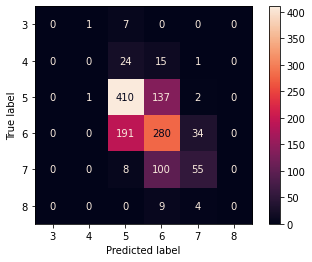

In [20]:
plot_confusion_matrix(lr_pca, X_train_pca, y_train, values_format='.0f', cmap='rocket')
plt.show()

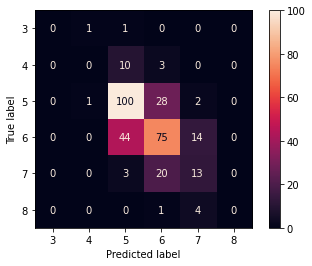

In [21]:
plot_confusion_matrix(lr_pca, X_test_pca, y_test, values_format='.0f', cmap='rocket')
plt.show()

Repeat the modeling process but transform your predictors using `LocallyLinearEmbedding` instead of `PCA`.

* Use `n_neighbors` = 30
* Set `n_components` to the same value you used for PCA
* Use `method`='standard'

In [22]:
# Apply LLE
lle = LocallyLinearEmbedding(n_components=7, n_neighbors=30, method='standard')
X_train_lle = lle.fit_transform(X_train_sca)
X_test_lle = lle.transform(X_test_sca)

In [23]:
# Fitting Logistic regression into dataset
lr_lle = LogisticRegression()
lr_lle.fit(X_train_lle, y_train)
train_preds_lle = lr_lle.predict(X_train_lle)
test_preds_lle = lr_lle.predict(X_test_lle)

In [25]:
accuracy_score(y_train, train_preds_lle)

0.5308835027365129

In [26]:
accuracy_score(y_test, test_preds_lle)

0.528125

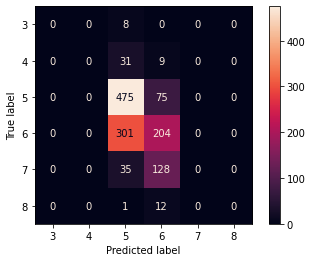

In [27]:
plot_confusion_matrix(lr_lle, X_train_lle, y_train, values_format='.0f', cmap='rocket')
plt.show()

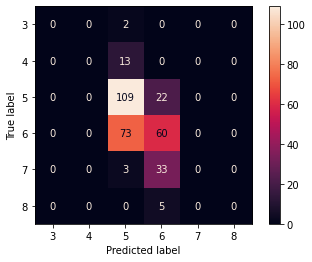

In [28]:
plot_confusion_matrix(lr_lle, X_test_lle, y_test, values_format='.0f', cmap='rocket')
plt.show()

Compare the model performance. What conclusions can you draw?

They essentially have the same results, probably because the target variable is very unbalanced. 